#                                                 __Algorithmics__

**EX 1.**

In the lectures, we tried to establish what is the information-theoretic bound in the smallest number of bits needed to represent binary trees. Slides claimed that there are up to 2 ^ 2n distinct trees of n nodes, but we also showed that Catalan numbers count the number of different trees. Compare the growth rate of Catalan numbers vs 2^{2n}. Plot the numbers (use logarithmic axes to fit larger values on plots). Are they in Theta() relationship (exactly the same growth rate)?

        - Solution: As we see from the plotting of the growth of the numbers, growth rate of the 2 ^ 2n is higher than the growth of the catalan numbers. So we can not say that there is Theta() relationship between them.

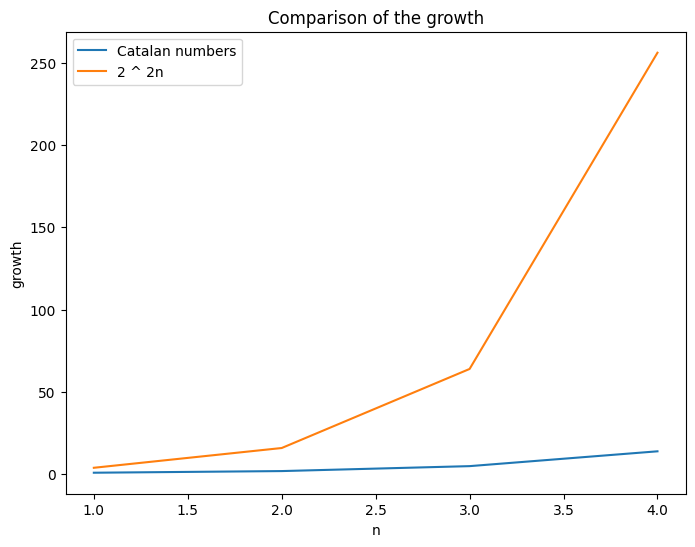

In [14]:
import matplotlib.pyplot as plt
import math

n = [i for i in range(1, 5)]
cat = [ (math.factorial(2 * i)) / (math.factorial(i + 1) * math.factorial(i)) for i in range(1, 5)]
func = [2 ** (2 * i) for i in range(1, 5)]
    
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(n, cat)
plt.plot(n, func)                            
plt.title("Comparison of the growth")
plt.xlabel('n')
plt.ylabel('growth')
plt.legend(['Catalan numbers', '2 ^ 2n'])
plt.show()

**EX 2**

A binomial tree (not a binary heap!) of degree 4 (or any degree) has a very specific structure. If you would need an implicit structure to represent it, there is exactly one such tree. Draw a binomial tree of degree 4 and number the nodes in the following ways (for this one, it might be a good idea to start numbering from 0 / 0000):

   - Post-order
   - Pre-order
   - Level-order (label nodes level-by-level)
    
Hint: Post-order is on lecture slides (Heaps, Page 16, Figure 20.4)

Represent the tree as arrays, where the array index represents the number you gave to the node. Now take post-order node nr 11 (binary 1011, check heaps slides, same as before) as a reference node. Try to give indexing formulas to access the reference points parents and children for each representation (e.g. for normal heaps and its array structure the accessing was parent=i//2, child=i*2 (+1)). You can also try to use the number of combinations in your formulas e.g. 4 choose 2 (C(4,2)) or look at bit representations of your numbers (e.g. 1111 = 15) to see if you see some patterns.

For the following exercises, make sure to also shortly describe, what is the procedure to create the succinct representation and how to find the parent and children nodes.

        - Solution: Here degree is 4 (k = 4). Therefore the binomial tree will be like below:

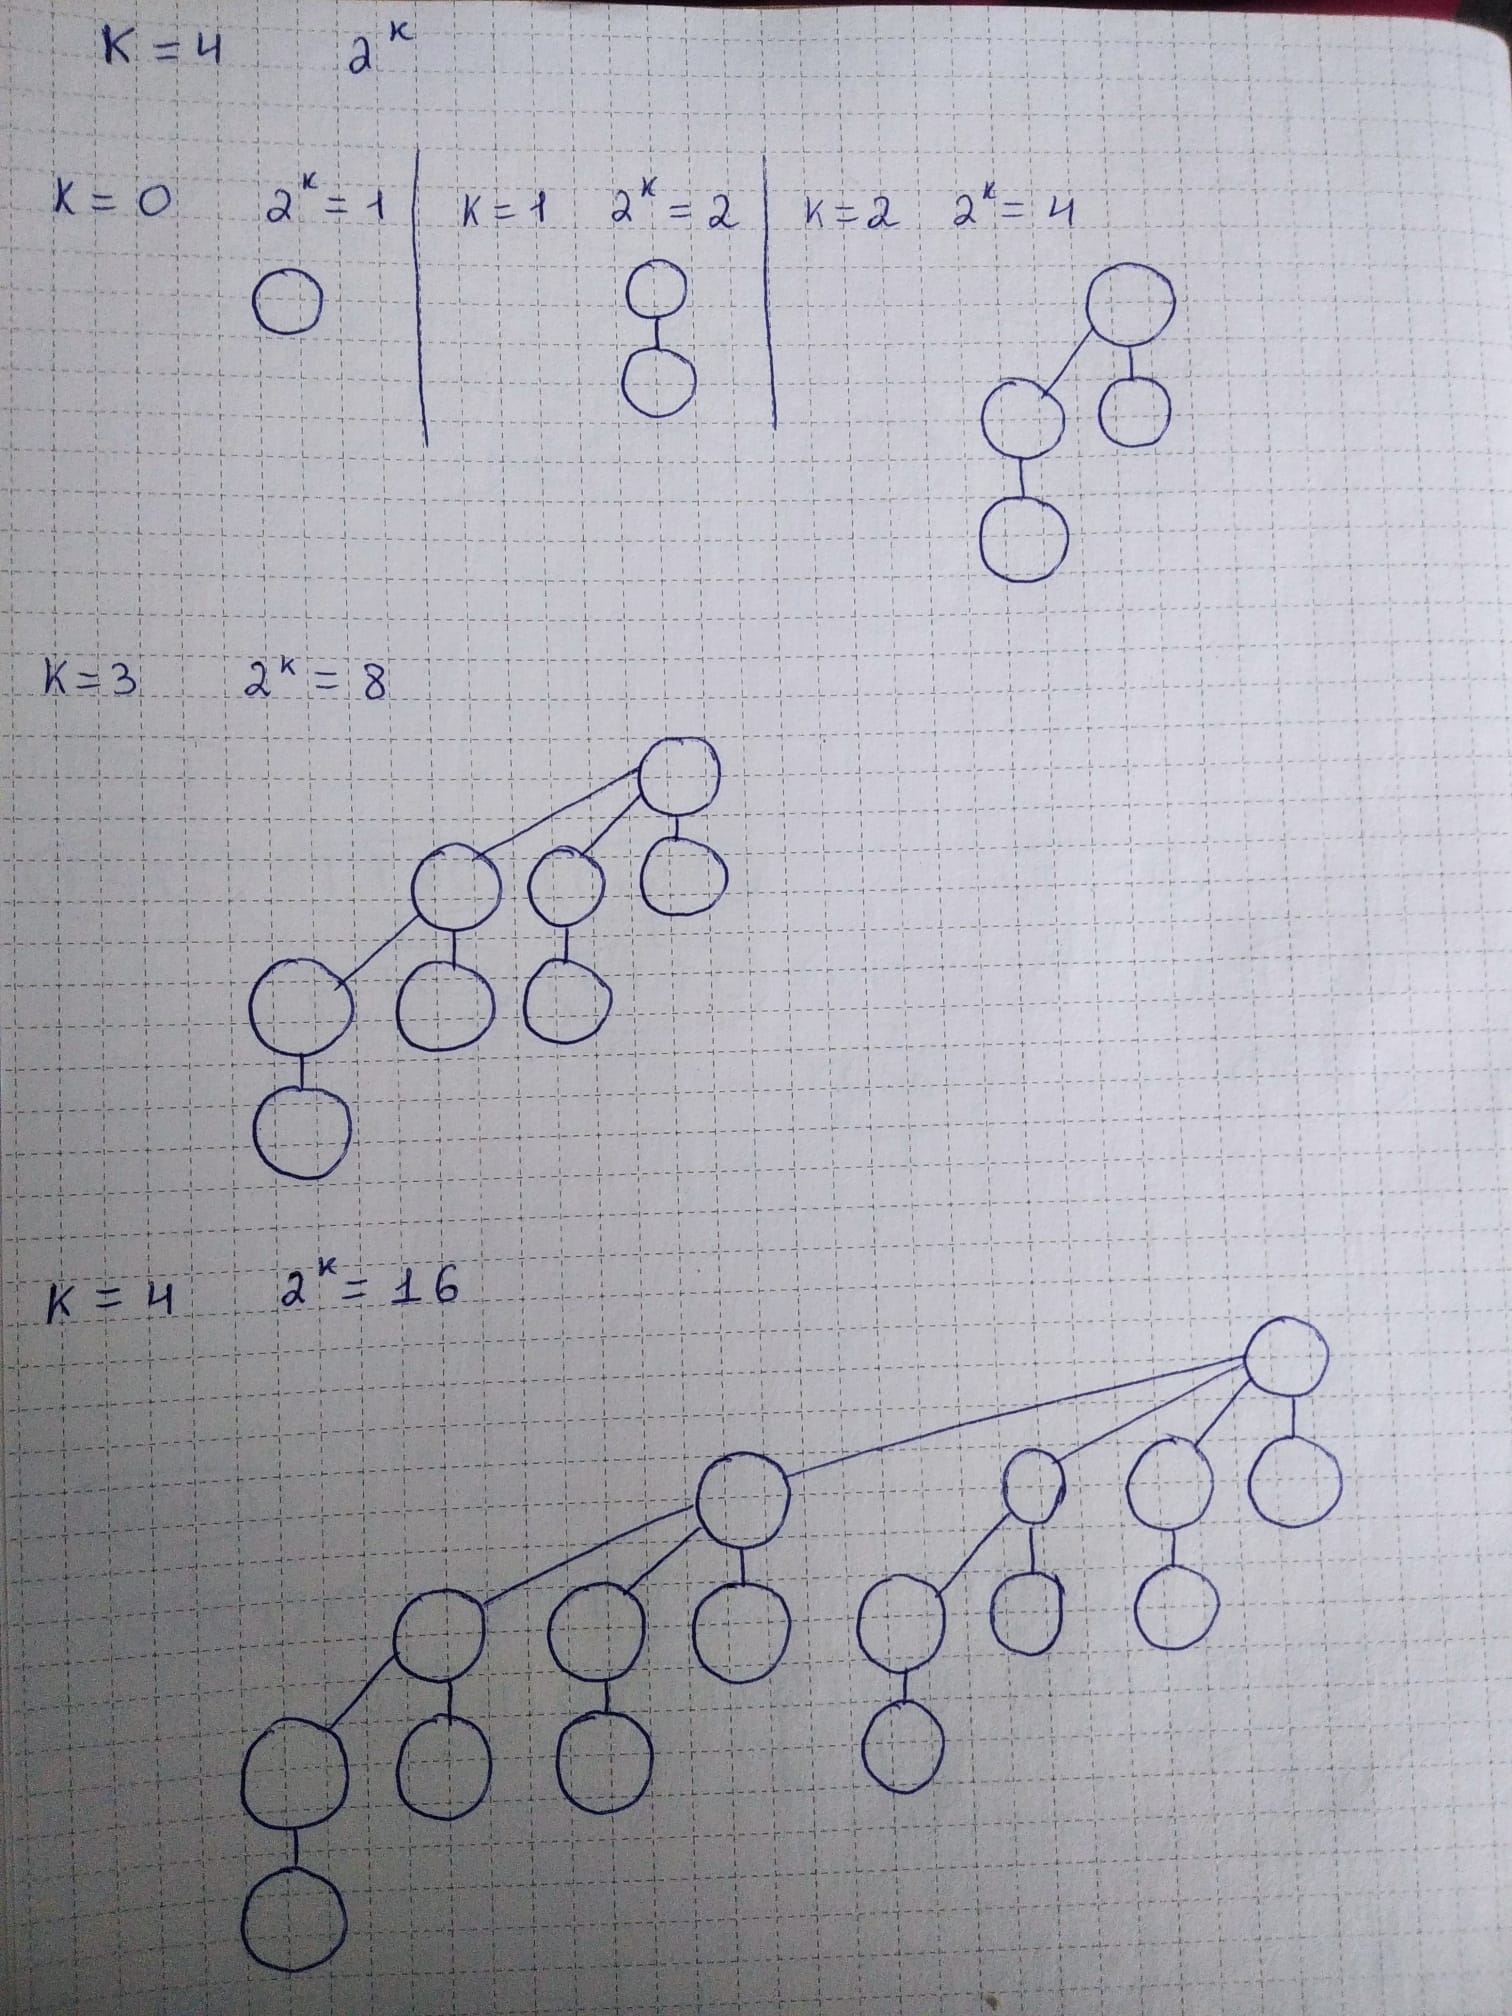

        - Post-order: Now we are numbering the binomial tree as a post-order:

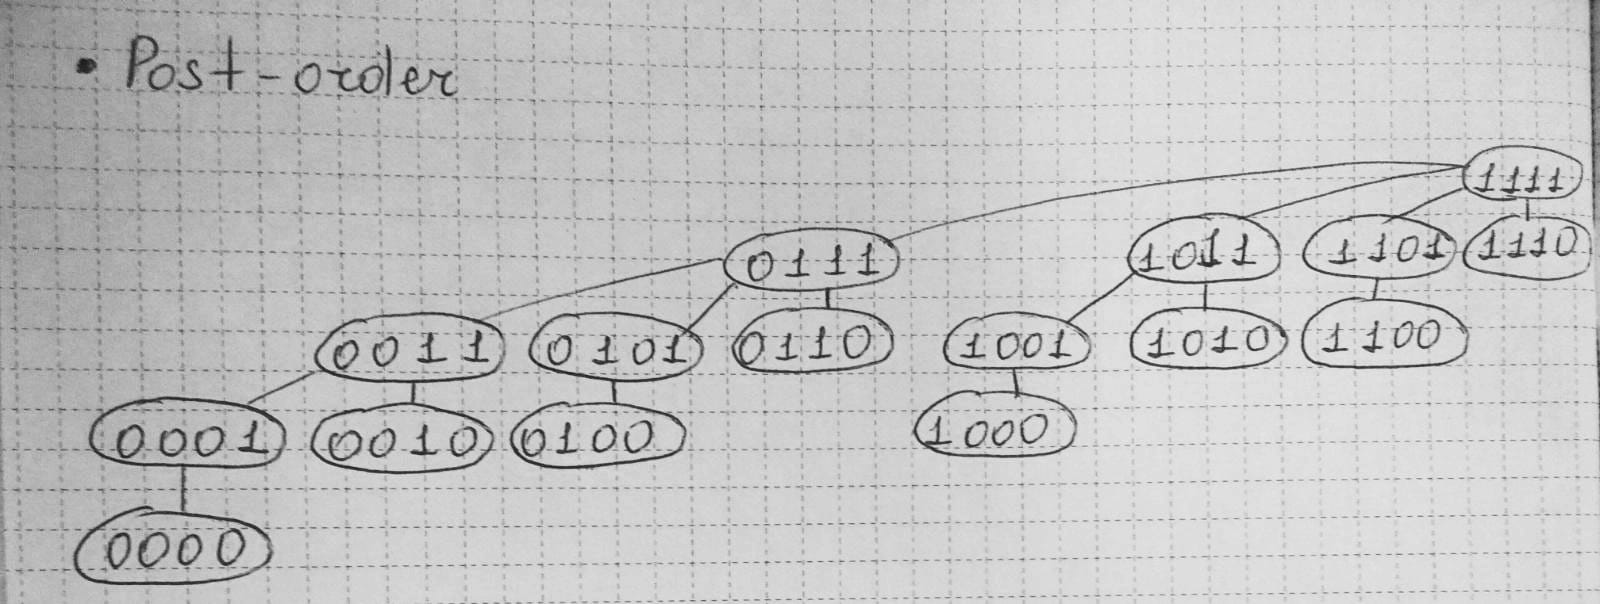

        - Pre-order: Now we are numbering the binomial tree as a pre-order:

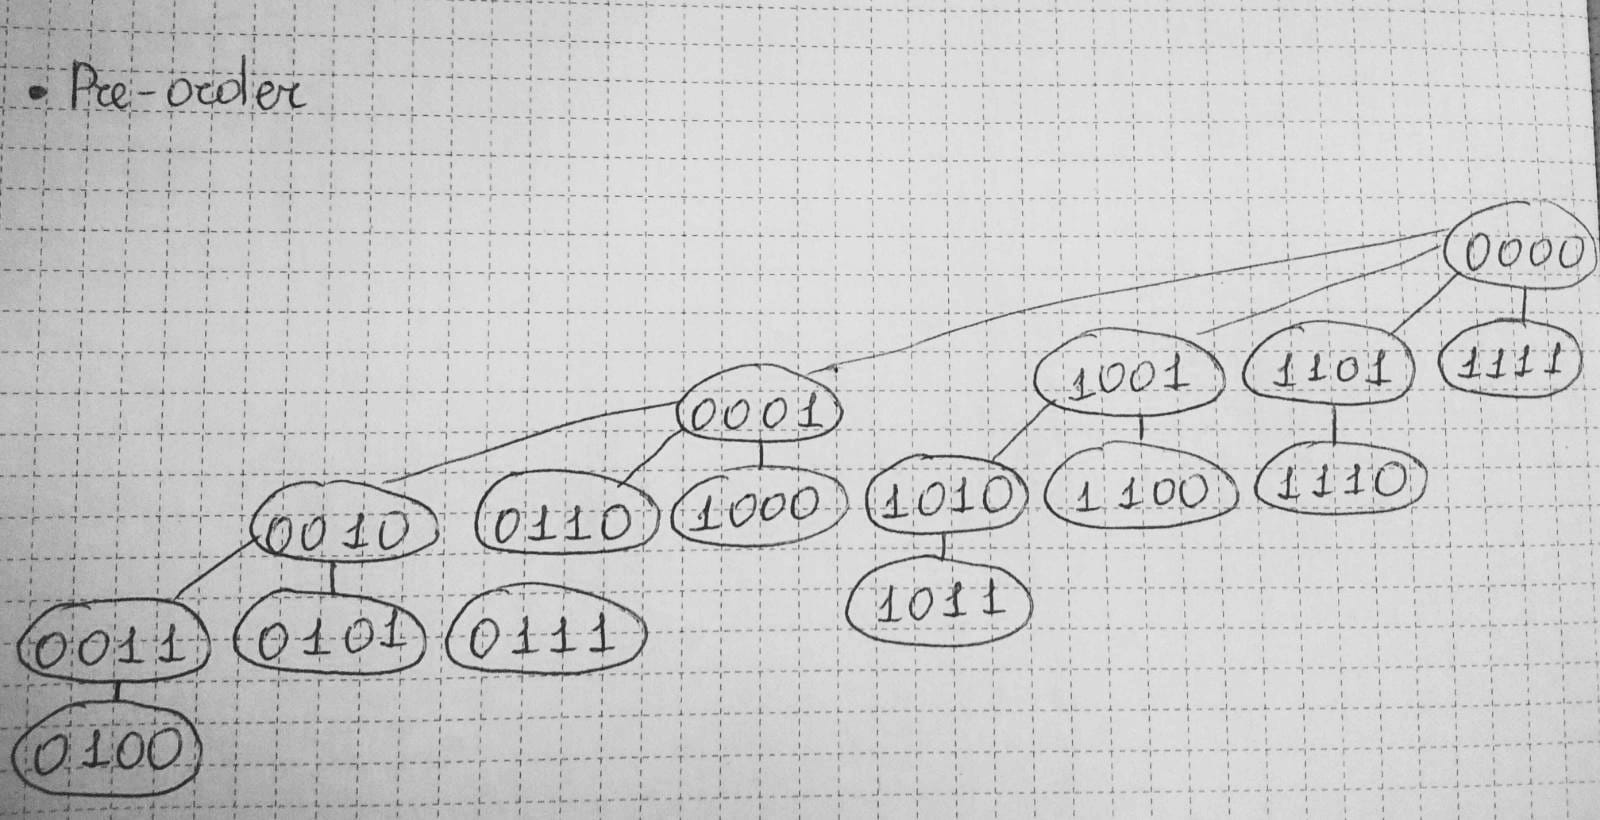

        - Level-order: Now we are numbering the binomial tree as a level-order:

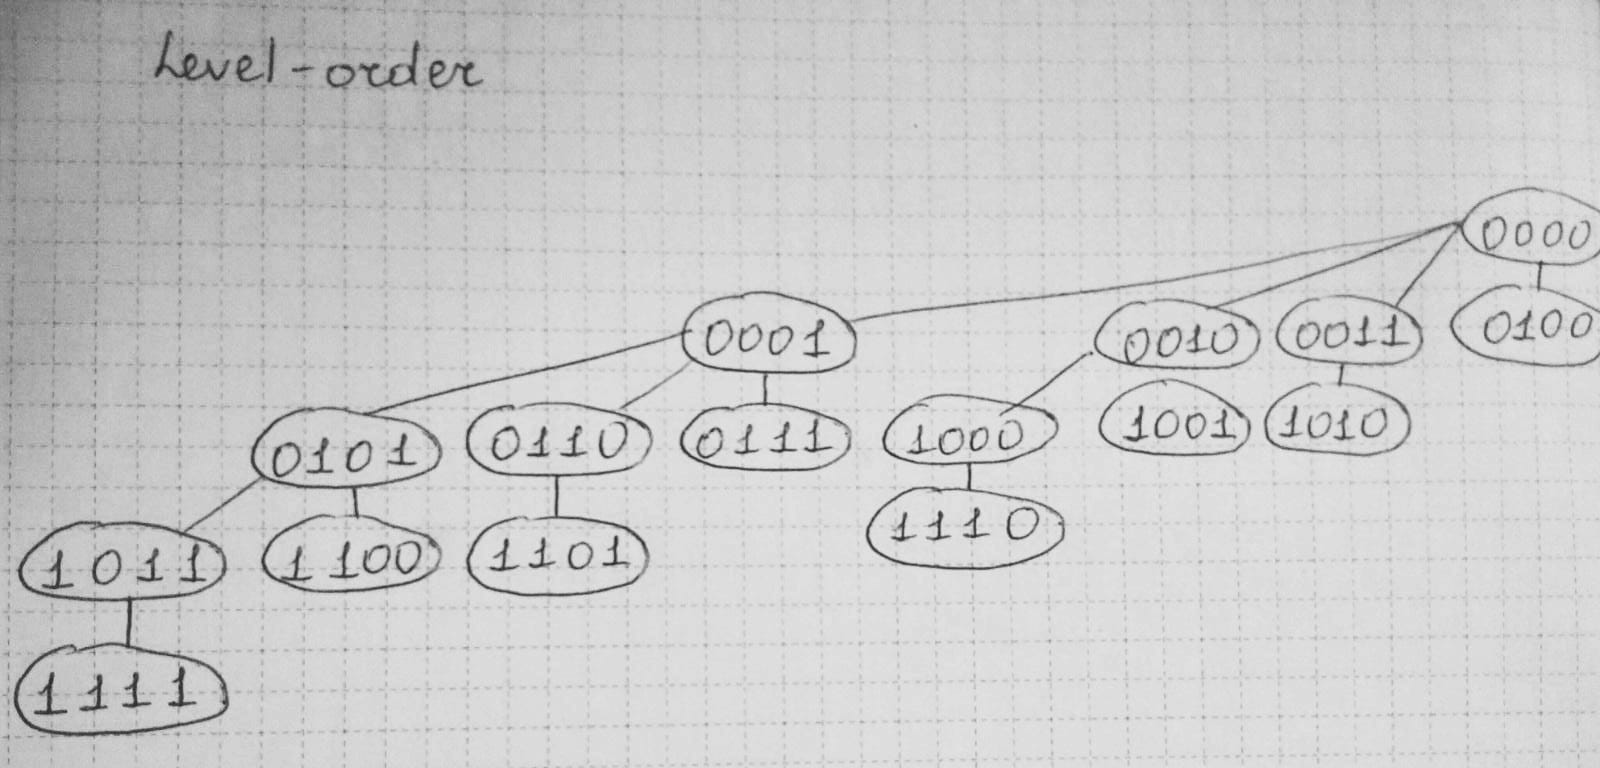

**EX 3**

Represent the same tree in a Level-order unary degree sequence (check slides). Show how you perform operations of finding parent, i-th child. In order to do that, you might want to describe rank and select operations first.

        -Solution: First we will look at the same tree with the EX 2. Here, firstly, we write that how many children every node has:

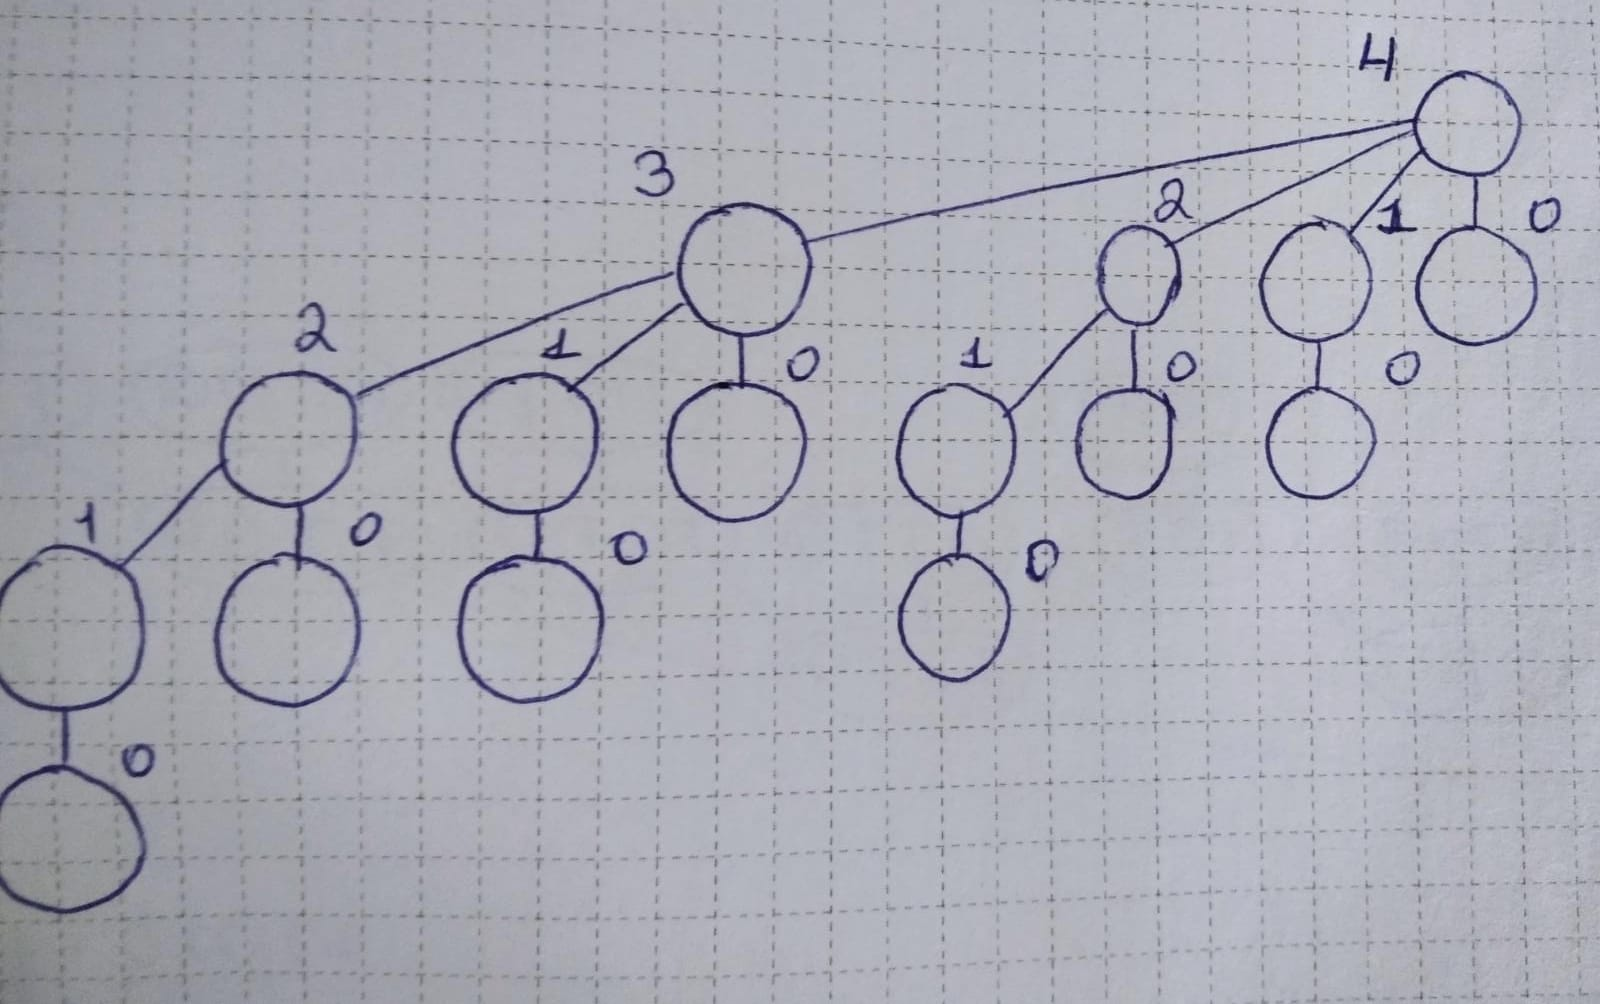

        Degree sequence in level order: 4 3 2 1 0 2 1 0 1 0 0 1 0 0 0 0
        In unary : 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0

        Now we will look at how we perform operations of finding parent, i-th child. In order to do this we will add dummy root and number the nodes:
        
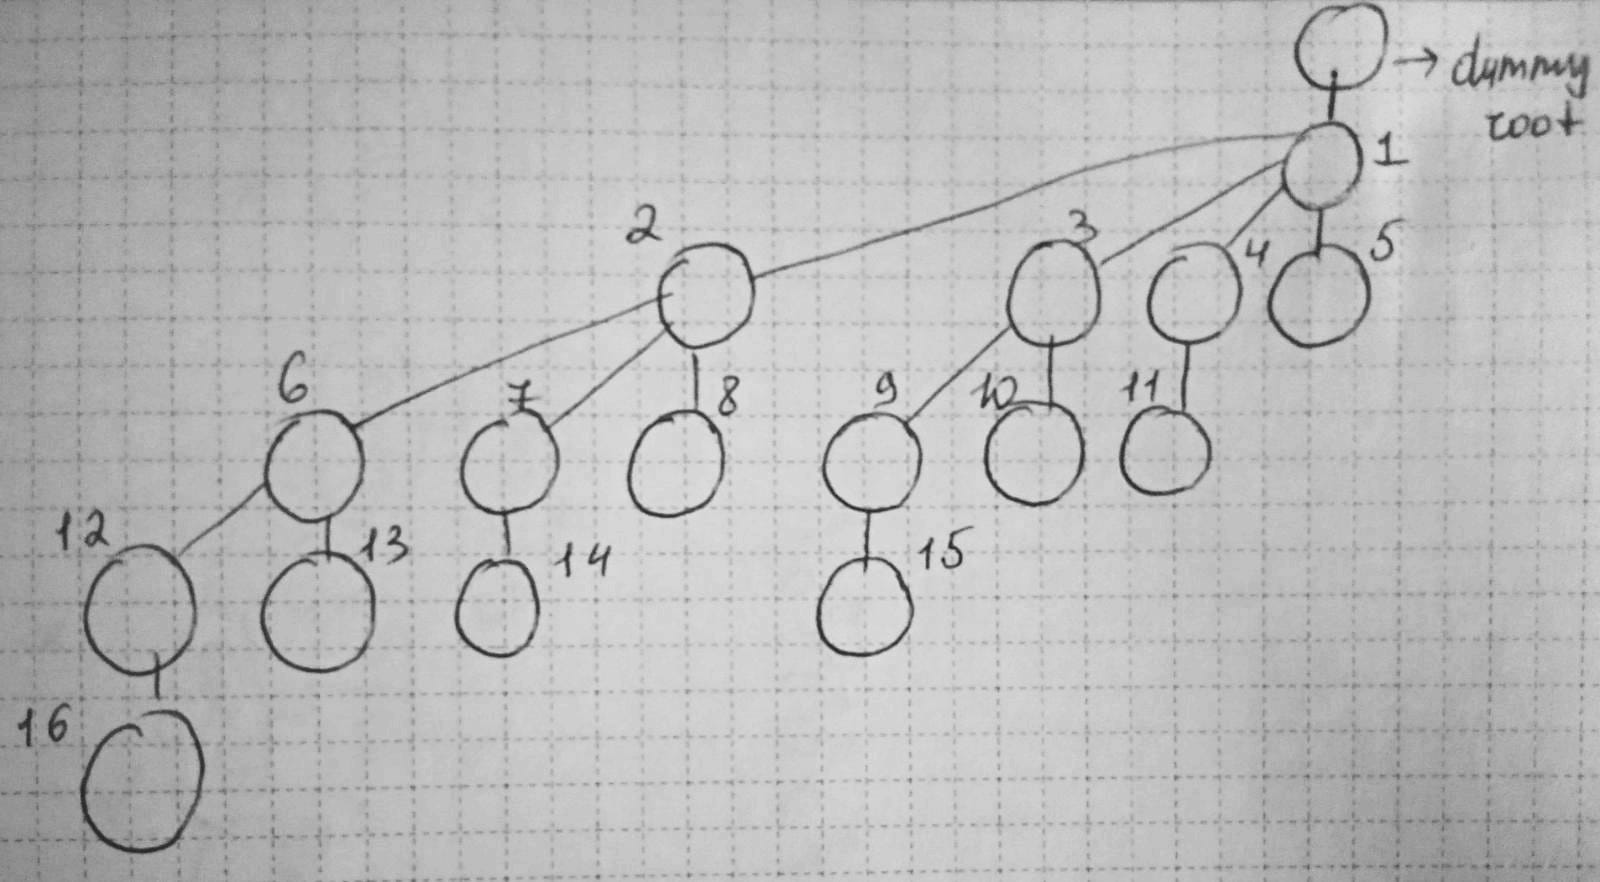



 - After adding the new node, we also add it to unary : 1 0 1 1 1 1 0 1 1 1 0 1 1  0 1  0 0 1  1  0 1 0 0 1 0 0 0 1 0 0 0 0 0
 
 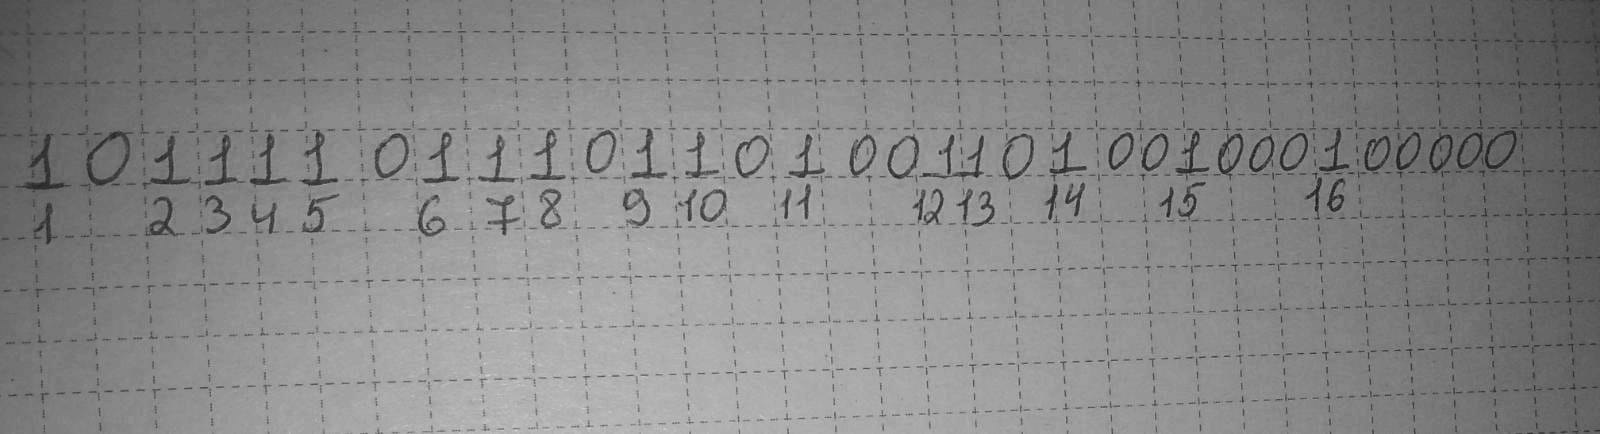
 
                                                           
 - As we see from here, we have 16 nodes(each node has a corresponding 1). 
                                      Let's look at parent(11) = the number of 0s before 11 is 4, so 4 is the parent of 11.
                                                  parent(16) = the number of 0s before 16 is 12, so 12 is the parent of 16.
                                                       
 - In order to find i-th child we are looking at next to the i-th 0. For example, we would like to find 8's child. Therefore, we will look at next to the 8th 0, and it is 0. So it shows that 8 node does not have child. If we would like to find 6's child, after 6th 0 we have 12 and 13, so 12 and 13 are the children of 6. 

**EX 4**

Represent the same tree, this time using Parenthesis representation. Show how to perform operations of finding parent, first child, next sibling.

Represent the same tree, this time using Depth-first unary degree sequence (DFUDS) representation. Show how to find parent, first child, next sibling.

Argue, which presentation feels the most natural for you.

        -By applying pre-order we are writing parenthesis representation.

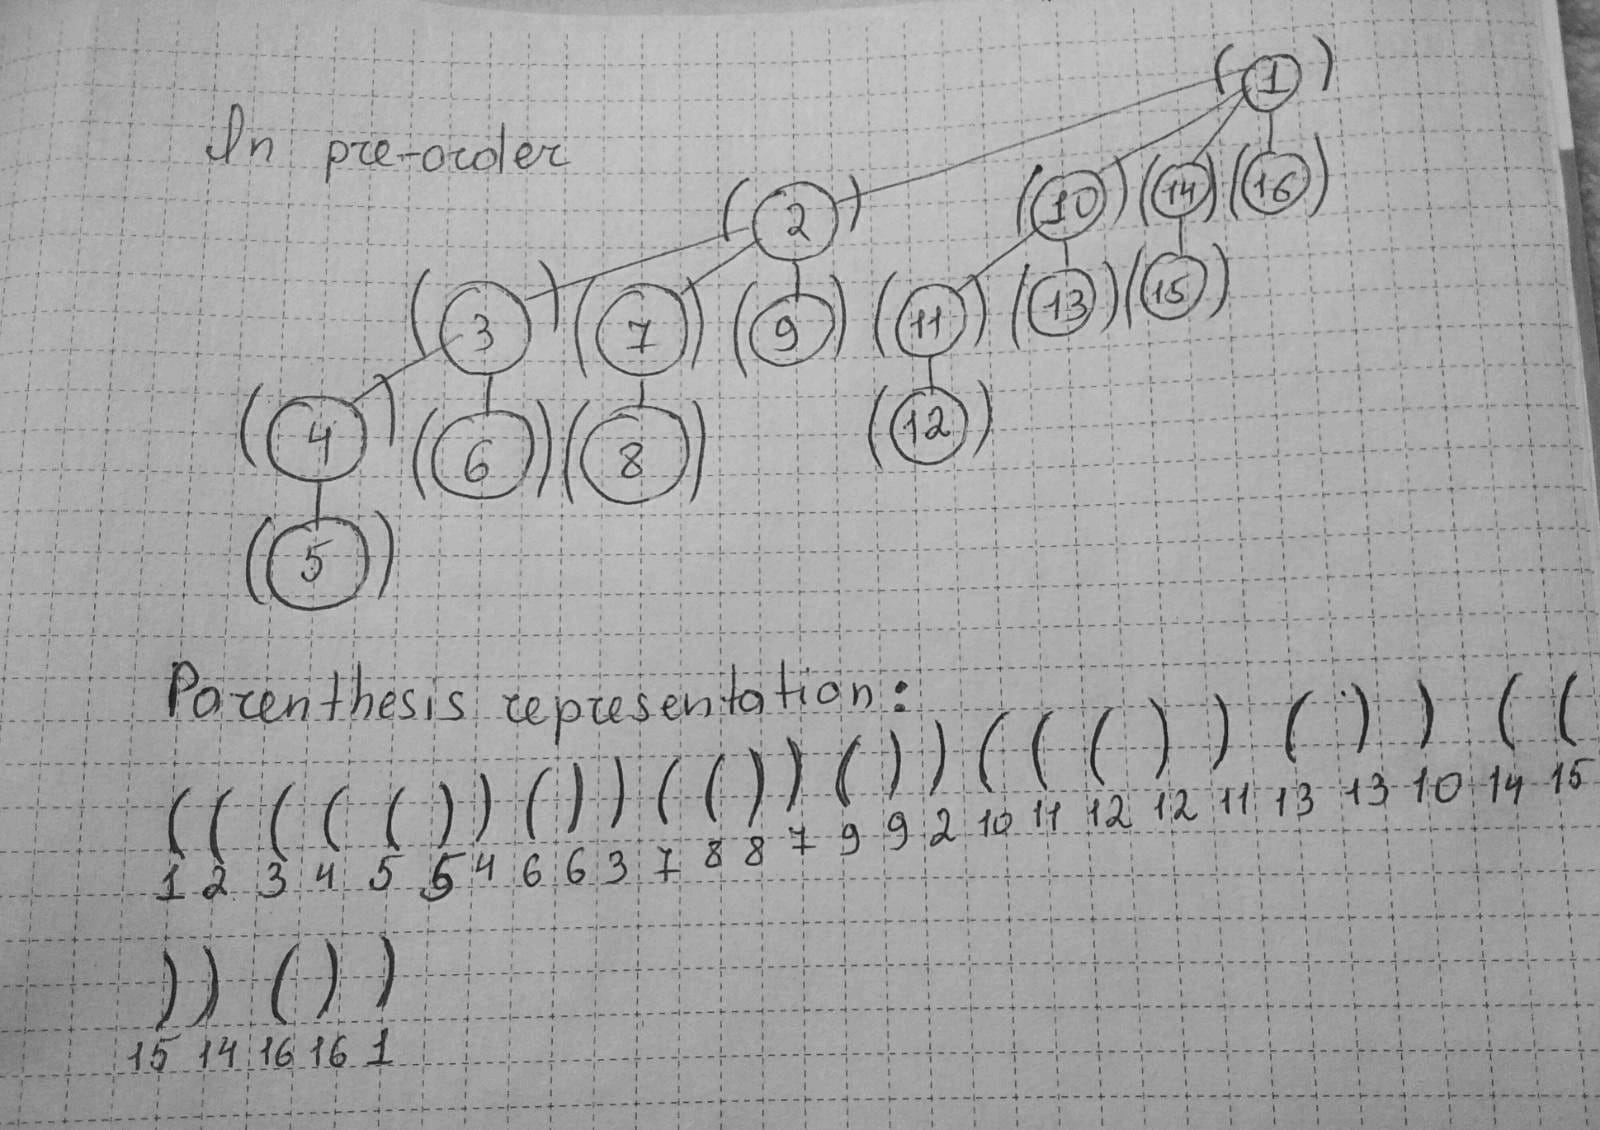

        - Here:
               parent --> enclosing paranthesis: for example, for 5 enclosing paranthesis is 4, and for 9 enclosing paranthesis is 2.
               first child --> next parenthesis(if 'open'): for example, for 3 next parenthesis is 4, and for 10 next parenthesis is 11.
               next sibling --> open parenthesis following the matching closing parenthesis(if exists): for example, for 4 following the matching closing parenthesis is 6, for 11 following the matching closing parenthesis is 13.

        -Next by applying pre-order we are writing depth-first unary degree sequence (DFUDS) representation.

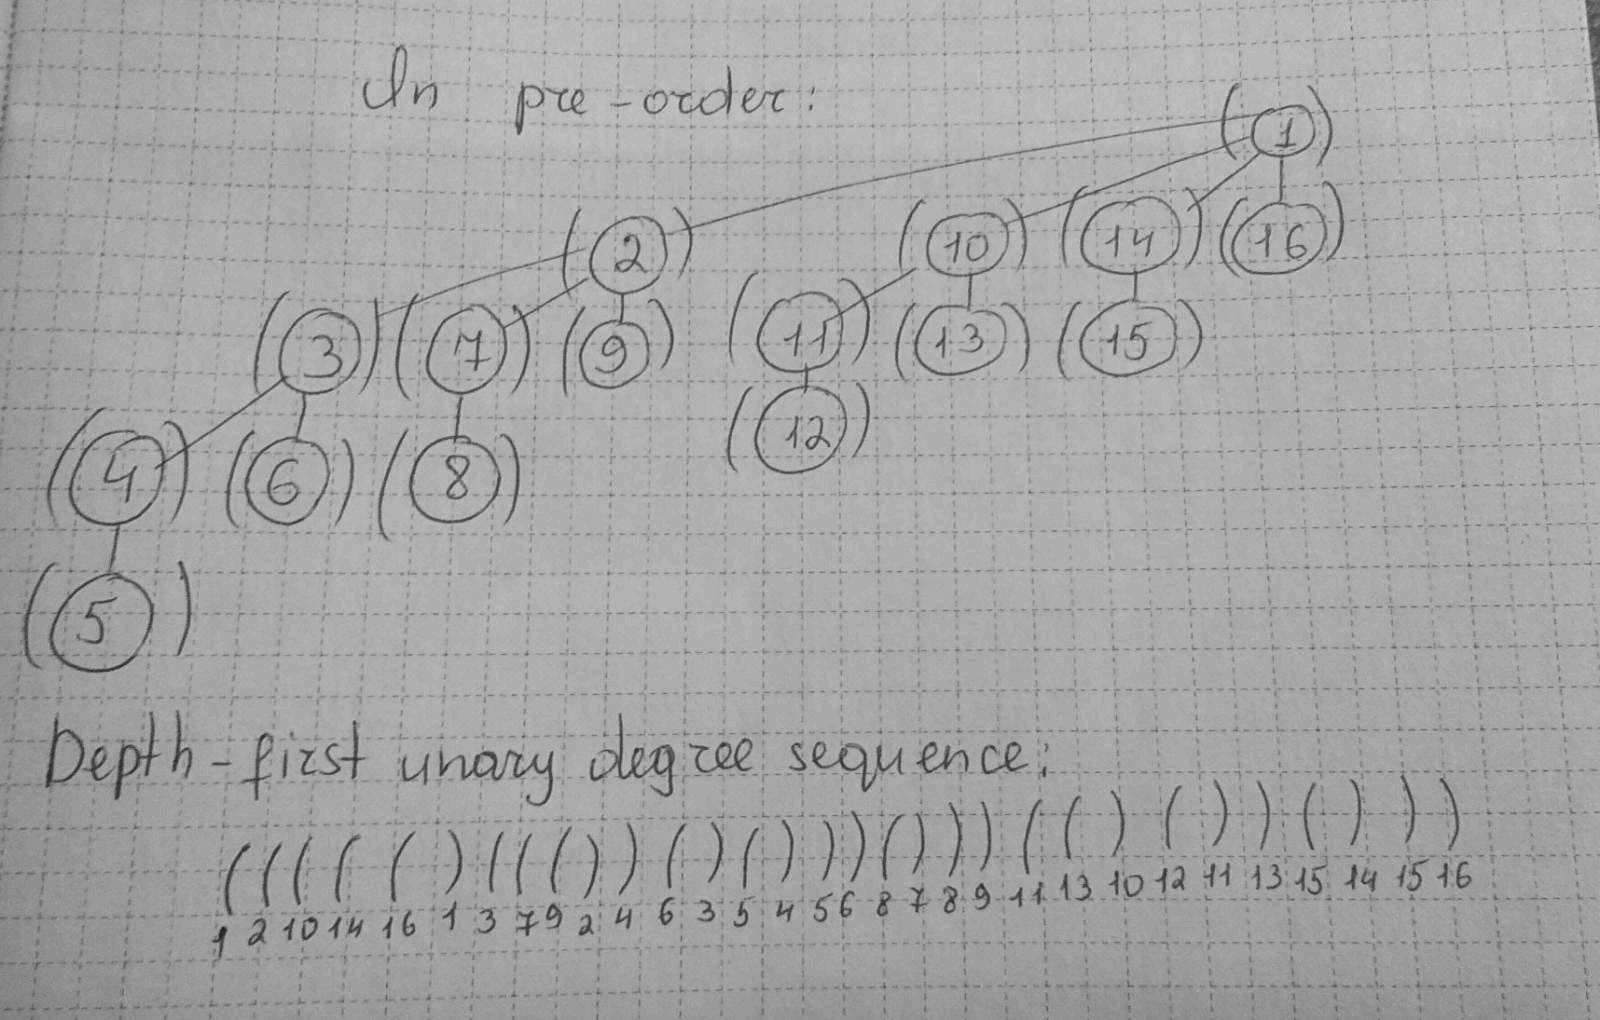

- Here:
           parent --> if closing parenthesis is inside of parenthesis pair : for example, for 5 enclosing paranthesis is 4, and for 9 enclosing paranthesis is 2.
           next sibling --> next parenthesis(if 'open'): for example, for 4 following the matching closing parenthesis is 6, for 11 following the matching closing parenthesis is 13. While doing this part of the task I used this source: http://www.eecs.tufts.edu/~aloupis/comp150/projects/SuccinctTreesinPractice.pdf

**EX 5**

 Describe two further operations - subtree size and the lowest common ancestor of two nodes using one of the above representations (Parenthesis, DFUDS). Why do you need such operations?

Briefly describe in your own words, why do we care about succinct data structures at all? What is the potential trade-off in using less memory? i.e. what do we gain and what do we lose?

        -Solution: Here I will use the Parenthesis representation, and also I will use the same tree with EX4:
        
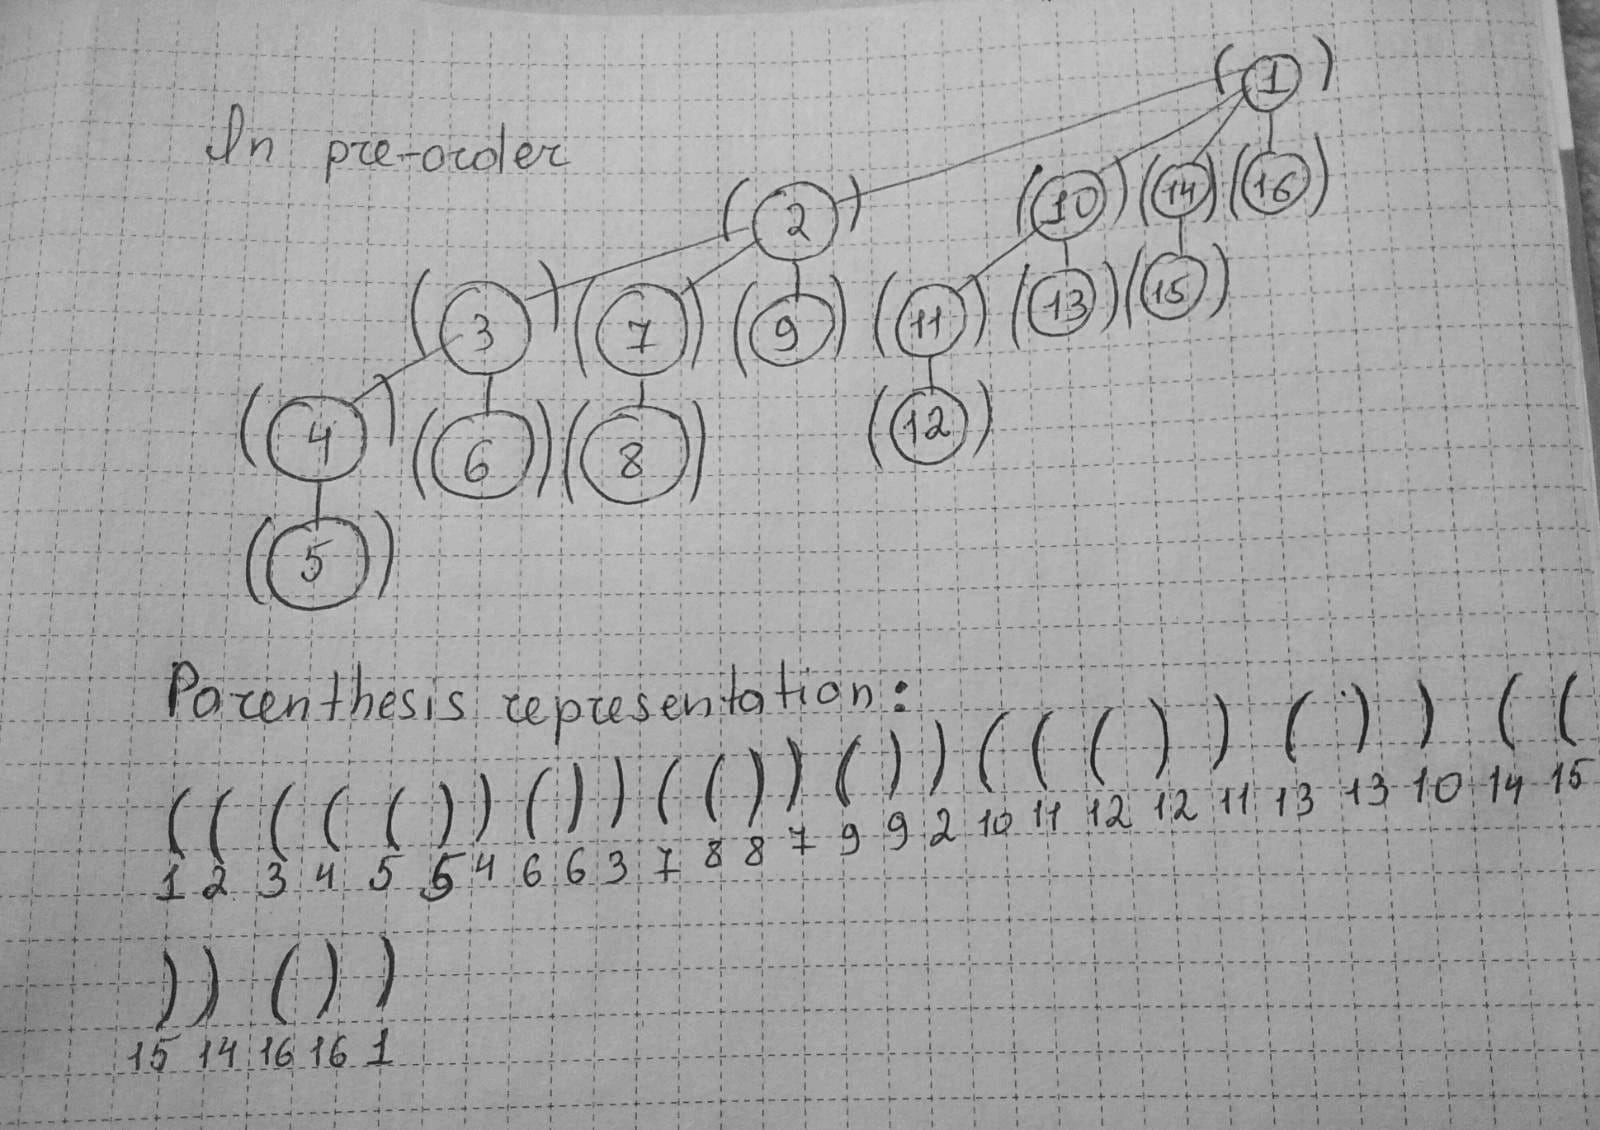

        

        -In order to find the sub-tree of the Parenthesis, we will half the number of parentheses between the pair. For example, for 2 the number of parentheses between the pair is 14, and the half of the for is 7. So sub-tree(2) = 7.
        -The lowest common ancestor of 4 and 8 is 2. Because in paranthesis representation their paranthesis pairs are inside of the  paranthesis pairs of 1 and 2, but 2 is the lowest one.